In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('G:/SEM 5/mini-project/code new/clustering/cluster-3.csv', header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AM_SE         327 non-null    int64  
 1   AM_IA         327 non-null    int64  
 2   DLDA_SE       327 non-null    int64  
 3   DLDA_IA       327 non-null    int64  
 4   DSGT_SE       327 non-null    int64  
 5   DSGT_IA       327 non-null    int64  
 6   ECCF_SE       327 non-null    int64  
 7   ECCF_IA       327 non-null    int64  
 8   DS_SE         327 non-null    int64  
 9   DS_IA         327 non-null    int64  
 10  DigitalSL_TW  327 non-null    int64  
 11  DSL_OP        327 non-null    int64  
 12  BE_TW         327 non-null    int64  
 13  BE_OP         327 non-null    int64  
 14  DataSL_TW     327 non-null    int64  
 15  DSL_OP.1      327 non-null    int64  
 16  OOPM_TW       327 non-null    int64  
 17  OOPM_OP       327 non-null    int64  
 18  GPA           327 non-null    

In [4]:
df.head()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA
0,77,17,52,18,62,20,53,18,53,17,24,23,24,22,24,24,48,46,9.08
1,77,19,57,18,68,20,58,18,60,18,23,23,23,22,24,24,44,46,9.54
2,18,8,42,11,47,18,34,12,44,16,23,23,23,22,21,24,42,48,0.00
3,38,12,52,12,40,18,54,13,60,18,23,22,21,22,24,24,45,46,7.54
4,55,11,57,13,46,13,42,10,32,14,20,20,21,21,23,22,42,48,7.12


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df['GPA'].values
y
X = df.values
X = np.delete(X,18,axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)


0.8390088612056819

## k-means 

In [9]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

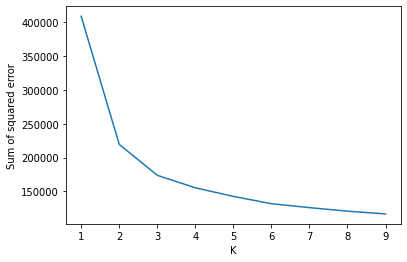

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [12]:
score = np.array(sse)
diff_scores = score / score[0]
diff_scores = np.diff(diff_scores)
n_clusters = np.argwhere(diff_scores < np.quantile(diff_scores, 0.9))[-1][0]
print(n_clusters)

6


In [13]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(X)
y_predicted

array([2, 0, 5, 4, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 5, 2, 4, 2, 1, 1,
       2, 1, 1, 5, 1, 1, 2, 2, 2, 1, 2, 5, 2, 0, 1, 1, 5, 1, 2, 1, 2, 4,
       1, 3, 0, 1, 1, 1, 2, 3, 5, 2, 1, 0, 1, 5, 2, 2, 2, 3, 1, 1, 1, 0,
       4, 2, 1, 1, 2, 0, 5, 2, 1, 2, 2, 2, 1, 4, 5, 2, 0, 1, 5, 5, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 5, 2, 1, 3, 5, 1, 2, 1, 3, 5, 5, 5, 5, 5,
       3, 5, 1, 5, 5, 0, 4, 4, 5, 5, 4, 3, 4, 0, 1, 0, 0, 4, 0, 0, 2, 4,
       2, 2, 0, 4, 0, 4, 0, 5, 4, 2, 0, 0, 0, 2, 0, 0, 4, 5, 0, 2, 4, 0,
       4, 1, 5, 5, 4, 1, 1, 5, 5, 4, 5, 4, 5, 4, 4, 5, 4, 3, 4, 0, 2, 4,
       2, 5, 5, 0, 0, 4, 0, 5, 4, 0, 2, 1, 0, 5, 4, 5, 4, 5, 5, 1, 0, 1,
       4, 0, 4, 4, 1, 4, 2, 1, 3, 3, 3, 3, 4, 5, 3, 3, 5, 1, 3, 3, 5, 0,
       3, 4, 3, 5, 5, 5, 0, 0, 4, 2, 0, 5, 2, 2, 1, 2, 1, 4, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 5, 4, 4, 5, 0, 0, 4, 2, 0, 4, 0, 2, 0, 1,
       4, 4, 2, 0, 5, 2, 4, 0, 2, 1, 2, 4, 3, 3, 2, 2, 2, 0, 0, 1, 2, 0,
       4, 4, 0, 0, 0, 5, 0, 0, 0, 2, 2, 4, 0, 2, 0,

In [14]:
df['cluster']=y_predicted
df.head()
df.to_csv("cluster3.csv")

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
# df7 = df[df.cluster==6]
# df8 = df[df.cluster==7]
# df9 = df[df.cluster==8]
# df10 = df[df.cluster==9]
# df11 = df[df.cluster==10]
# df12 = df[df.cluster==11]
# df13 = df[df.cluster==12]
# df14 = df[df.cluster==13]
# df15 = df[df.cluster==14]
# df16 = df[df.cluster==15]
# df17 = df[df.cluster==16]

In [16]:
df1.to_csv("cluster3_0.csv")
df2.to_csv("cluster3_1.csv")
df3.to_csv("cluster3_2.csv")
df4.to_csv("cluster3_3.csv")
df5.to_csv("cluster3_4.csv")
df6.to_csv("cluster3_5.csv")
# df7.to_csv("cluster6.csv")
# df8.to_csv("cluster7.csv")
# df9.to_csv("cluster8.csv")
# df10.to_csv("cluster9.csv")
# df11.to_csv("cluster10.csv")
# df12.to_csv("cluster11.csv")
# df13.to_csv("cluster12.csv")
# df14.to_csv("cluster13.csv")
# df15.to_csv("cluster14.csv")
# df16.to_csv("cluster15.csv")
# df17.to_csv("cluster16.csv")

In [17]:
df1.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA,cluster
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,69.628571,17.785714,66.385714,15.385714,68.142857,17.90000,62.500000,15.700000,59.157143,17.000000,22.442857,21.128571,22.042857,21.157143,23.100000,21.528571,44.814286,45.314286,9.480143,0.0
std,6.283568,1.832816,5.270351,2.234725,7.102328,1.95715,6.250217,2.752338,7.210370,2.126438,1.741528,1.413408,1.797226,1.975471,1.105323,2.580425,2.698861,2.673232,0.365174,0.0
min,56.000000,12.000000,56.000000,9.000000,45.000000,13.00000,50.000000,10.000000,39.000000,11.000000,18.000000,18.000000,16.000000,18.000000,20.000000,13.000000,38.000000,38.000000,8.690000,0.0
25%,64.250000,17.000000,63.000000,14.000000,66.000000,17.00000,56.250000,13.000000,54.000000,16.000000,21.000000,20.000000,21.000000,20.000000,23.000000,20.000000,43.000000,44.000000,9.230000,0.0
50%,69.000000,18.000000,67.000000,16.000000,70.000000,18.00000,63.500000,16.000000,59.000000,17.000000,23.000000,21.000000,22.000000,21.000000,23.000000,22.500000,45.000000,46.000000,9.540000,0.0
75%,75.000000,19.000000,70.000000,17.000000,72.000000,19.00000,68.000000,18.000000,65.000000,19.000000,24.000000,22.000000,23.750000,22.000000,24.000000,24.000000,47.000000,48.000000,9.780000,0.0
max,80.000000,20.000000,78.000000,19.000000,79.000000,20.00000,75.000000,20.000000,70.000000,20.000000,24.000000,24.000000,24.000000,32.000000,24.000000,24.000000,49.000000,49.000000,10.000000,0.0


In [18]:
df2.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA,cluster
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,55.732143,11.767857,41.750000,11.464286,42.321429,15.107143,37.250000,11.267857,42.678571,13.535714,20.517857,20.446429,20.160714,20.250000,21.553571,20.535714,42.000000,42.857143,6.161071,1.0
std,7.525692,2.649124,8.638708,2.600450,7.291607,2.570310,7.189007,2.561896,8.952617,2.628268,2.304076,2.471066,2.060686,1.686848,2.156762,2.350739,3.572623,3.896052,2.191361,0.0
min,41.000000,4.000000,24.000000,5.000000,27.000000,8.000000,9.000000,5.000000,19.000000,7.000000,15.000000,13.000000,13.000000,16.000000,14.000000,15.000000,31.000000,34.000000,0.000000,1.0
25%,50.750000,9.000000,35.000000,10.000000,37.750000,13.750000,33.000000,9.000000,36.000000,12.000000,19.000000,19.000000,19.000000,19.000000,20.750000,19.000000,39.750000,40.000000,6.490000,1.0
50%,54.500000,11.000000,40.000000,11.000000,41.500000,15.000000,36.000000,11.500000,43.000000,14.000000,21.000000,20.000000,20.000000,20.500000,22.000000,21.000000,42.000000,44.000000,6.885000,1.0
75%,62.000000,14.000000,46.250000,13.000000,47.250000,17.000000,42.000000,13.000000,49.000000,15.000000,22.000000,23.000000,21.250000,21.250000,23.000000,22.000000,45.000000,46.000000,7.150000,1.0
max,74.000000,17.000000,67.000000,17.000000,58.000000,20.000000,55.000000,16.000000,63.000000,19.000000,24.000000,24.000000,23.000000,23.000000,24.000000,24.000000,48.000000,48.000000,7.730000,1.0


In [19]:
df3.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA,cluster
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,65.882353,15.044118,54.294118,13.529412,56.058824,17.044118,49.323529,13.911765,51.750000,15.485294,22.000000,20.955882,20.970588,20.823529,22.250000,21.044118,43.720588,43.632353,8.332059,2.0
std,5.801517,2.611306,7.824681,3.173917,6.250689,2.476359,8.069551,2.935807,8.882945,2.464631,1.892641,1.896059,1.770155,1.786694,1.596405,2.458211,2.838149,3.693093,0.445557,0.0
min,55.000000,10.000000,32.000000,8.000000,39.000000,9.000000,33.000000,7.000000,26.000000,10.000000,16.000000,13.000000,16.000000,16.000000,16.000000,14.000000,37.000000,33.000000,7.540000,2.0
25%,61.000000,13.000000,49.750000,11.000000,51.750000,16.000000,44.000000,11.750000,47.000000,14.000000,21.000000,20.000000,20.000000,20.000000,22.000000,20.000000,41.750000,42.000000,7.960000,2.0
50%,66.500000,15.000000,54.500000,13.000000,56.000000,18.000000,50.000000,14.000000,53.000000,15.000000,23.000000,21.000000,21.000000,21.000000,23.000000,22.000000,44.000000,45.000000,8.400000,2.0
75%,70.000000,17.000000,60.000000,16.000000,60.000000,19.000000,55.000000,16.000000,58.000000,17.000000,23.250000,22.000000,22.000000,22.000000,23.000000,23.000000,46.000000,46.000000,8.620000,2.0
max,78.000000,19.000000,71.000000,20.000000,72.000000,20.000000,65.000000,19.000000,67.000000,20.000000,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,49.000000,48.000000,9.230000,2.0


In [20]:
df4.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA,cluster
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,16.869565,6.869565,19.043478,9.217391,28.304348,10.956522,28.304348,9.304348,26.608696,10.260870,18.130435,16.260870,18.739130,18.130435,18.260870,15.913043,38.043478,39.782609,0.215652,3.0
std,8.092108,3.454961,8.081844,3.655090,10.096961,3.309467,10.644823,2.867289,9.561947,3.033411,3.721001,3.278267,2.434924,4.341181,2.815822,4.971858,6.026293,4.898576,1.034231,0.0
min,2.000000,0.000000,6.000000,3.000000,5.000000,5.000000,6.000000,3.000000,14.000000,4.000000,11.000000,12.000000,14.000000,0.000000,13.000000,0.000000,25.000000,31.000000,0.000000,3.0
25%,13.000000,5.000000,14.000000,6.000000,22.500000,9.000000,19.500000,8.000000,19.500000,8.000000,15.500000,13.500000,17.500000,17.000000,17.000000,13.000000,35.000000,35.500000,0.000000,3.0
50%,15.000000,8.000000,17.000000,10.000000,32.000000,11.000000,32.000000,9.000000,25.000000,10.000000,18.000000,17.000000,19.000000,20.000000,19.000000,16.000000,38.000000,40.000000,0.000000,3.0
75%,18.500000,9.000000,21.500000,12.000000,33.000000,12.500000,32.500000,11.000000,32.000000,13.000000,21.500000,18.500000,20.000000,20.000000,20.500000,20.000000,43.000000,44.000000,0.000000,3.0
max,36.000000,12.000000,32.000000,15.000000,43.000000,18.000000,53.000000,17.000000,55.000000,15.000000,23.000000,23.000000,24.000000,22.000000,22.000000,22.000000,47.000000,47.000000,4.960000,3.0


In [21]:
df5.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA,cluster
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,45.529412,13.901961,57.215686,12.921569,57.627451,16.176471,50.176471,12.588235,50.215686,15.764706,20.549020,20.333333,20.254902,19.784314,22.352941,19.941176,42.862745,42.156863,7.491961,4.0
std,8.205737,2.794673,7.671542,2.583355,8.713118,2.463379,8.519873,2.593657,8.276023,2.396566,2.247788,1.465151,1.988398,1.792359,1.741534,2.880359,3.990086,4.031737,1.618089,0.0
min,19.000000,9.000000,35.000000,8.000000,40.000000,10.000000,32.000000,4.000000,33.000000,10.000000,14.000000,16.000000,15.000000,15.000000,14.000000,12.000000,25.000000,33.000000,0.000000,4.0
25%,40.000000,12.000000,53.000000,11.000000,50.000000,15.000000,44.500000,11.000000,45.000000,14.500000,19.000000,20.000000,19.000000,19.000000,22.000000,18.000000,41.000000,40.000000,7.365000,4.0
50%,45.000000,14.000000,57.000000,13.000000,58.000000,16.000000,52.000000,12.000000,51.000000,16.000000,20.000000,20.000000,20.000000,20.000000,23.000000,20.000000,44.000000,42.000000,7.730000,4.0
75%,53.000000,16.000000,62.000000,15.000000,63.000000,18.000000,56.000000,15.000000,55.500000,17.000000,22.500000,21.000000,21.500000,21.000000,23.000000,22.000000,46.000000,45.500000,8.190000,4.0
max,56.000000,20.000000,75.000000,18.000000,73.000000,20.000000,65.000000,18.000000,68.000000,20.000000,24.000000,23.000000,24.000000,23.000000,24.000000,24.000000,48.000000,48.000000,9.080000,4.0


In [22]:
df6.describe()

,AM_SE,AM_IA,DLDA_SE,DLDA_IA,DSGT_SE,DSGT_IA,ECCF_SE,ECCF_IA,DS_SE,DS_IA,DigitalSL_TW,DSL_OP,BE_TW,BE_OP,DataSL_TW,DSL_OP.1,OOPM_TW,OOPM_OP,GPA,cluster
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,33.457627,10.152542,35.661017,9.711864,42.966102,12.864407,35.542373,10.457627,33.796610,11.694915,18.966102,18.355932,19.389831,18.779661,20.440678,18.423729,41.016949,41.050847,3.249492,5.0
std,8.604975,2.624904,8.255845,2.442800,8.630272,3.048220,10.788439,2.555063,7.212966,2.686199,3.513354,2.845218,2.505284,3.322171,2.574887,5.052153,4.561804,5.584534,3.150204,0.0
min,15.000000,4.000000,7.000000,4.000000,32.000000,8.000000,12.000000,4.000000,13.000000,7.000000,11.000000,12.000000,14.000000,0.000000,12.000000,0.000000,25.000000,29.000000,0.000000,5.0
25%,32.000000,9.000000,32.000000,8.000000,37.000000,10.000000,32.000000,8.500000,32.000000,9.500000,16.500000,17.000000,18.000000,17.000000,19.000000,16.500000,39.000000,37.000000,0.000000,5.0
50%,32.000000,10.000000,35.000000,10.000000,41.000000,13.000000,34.000000,10.000000,33.000000,12.000000,20.000000,19.000000,20.000000,19.000000,21.000000,19.000000,42.000000,43.000000,5.420000,5.0
75%,38.500000,12.000000,42.000000,11.000000,48.500000,15.000000,41.500000,12.000000,40.000000,14.000000,22.000000,20.000000,21.000000,21.000000,22.000000,22.000000,44.000000,46.000000,6.115000,5.0
max,51.000000,16.000000,53.000000,16.000000,68.000000,20.000000,59.000000,16.000000,47.000000,18.000000,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,48.000000,48.000000,8.810000,5.0


In [23]:
# cluster1=df.loc[df['cluster'] == 0]
# cluster2=df.loc[df['cluster'] == 1]
# cluster3=df.loc[df['cluster'] == 2]
# cluster4=df.loc[df['cluster'] == 3]
# cluster5=df.loc[df['cluster'] == 4]
# cluster6=df.loc[df['cluster'] == 5]

# scatter1 = dict(
#     mode = "markers",
#     name = "Cluster 1",
#     type = "scatter3d",    
#     x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
#     marker = dict( size=2, color='green')
# )
# scatter2 = dict(
#     mode = "markers",
#     name = "Cluster 2",
#     type = "scatter3d",    
#     x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
#     marker = dict( size=2, color='blue')
# )
# scatter3 = dict(
#     mode = "markers",
#     name = "Cluster 3",
#     type = "scatter3d",    
#     x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
#     marker = dict( size=2, color='red')
# )

# cluster1 = dict(
#     alphahull = 5,
#     name = "Cluster 1",
#     opacity = .1,
#     type = "mesh3d",    
#     x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
#     color='green', showscale = True
# )
# cluster2 = dict(
#     alphahull = 5,
#     name = "Cluster 2",
#     opacity = .1,
#     type = "mesh3d",    
#     x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
#     color='blue', showscale = True
# )
# cluster3 = dict(
#     alphahull = 5,
#     name = "Cluster 3",
#     opacity = .1,
#     type = "mesh3d",    
#     x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
#     color='red', showscale = True
# )
# cluster4 = dict(
#     alphahull = 5,
#     name = "Cluster 4",
#     opacity = .1,
#     type = "mesh3d",    
#     x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
#     color='green', showscale = True
# )
# cluster5 = dict(
#     alphahull = 5,
#     name = "Cluster 5",
#     opacity = .1,
#     type = "mesh3d",    
#     x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
#     color='blue', showscale = True
# )
# cluster6 = dict(
#     alphahull = 5,
#     name = "Cluster 6",
#     opacity = .1,
#     type = "mesh3d",    
#     x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
#     color='red', showscale = True
# )
# layout = dict(
#     title = 'Interactive Cluster Shapes in 3D',
#     scene = dict(
#         xaxis = dict( zeroline=True ),
#         yaxis = dict( zeroline=True ),
#         zaxis = dict( zeroline=True ),
#     )
# )
# fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# # Use py.iplot() for IPython notebook
# plotly.offline.iplot(fig, filename='mesh3d_sample')